In [51]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [52]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =1e20
import cmocean

In [53]:
%cd /work/eay/MITgcm_data/Experiment24/
file1 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment27/
file2 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment28/
file3 = nc.Dataset('Salt.nc')
%cd /work/eay/MITgcm_data/Experiment31/
file4 = nc.Dataset('Salt2.nc')
%cd /work/eay/MITgcm_data/
NX = 600
NY = 1000
NZ = 120

xq = (file1.variables['X'][:])
yq = (file1.variables['Y'][:])
zl = (file1.variables['Z'][:])
Time = file1.variables['T'][:]
print(Time.shape)



/work2/eay/MITgcm_data/Experiment24
/work2/eay/MITgcm_data/Experiment27
/work2/eay/MITgcm_data/Experiment28
/work2/eay/MITgcm_data/Experiment31
/work2/eay/MITgcm_data
(150,)


In [54]:
mask1 = file1.variables['S'][30,0,:,:]
newmask1 = file1.variables['S'][30,:,:,:]

mask2 = file2.variables['S'][30,0,:,:]
newmask2 = file2.variables['S'][30,:,:,:]

mask3 = file3.variables['S'][30,0,:,:]
newmask3 = file3.variables['S'][30,:,:,:]

mask4 = file4.variables['S'][30,0,:,:]
newmask4= file4.variables['S'][30,:,:,:]



mask1.shape

(1000, 600)

In [55]:
#Computing freshwater layer

index=-1

Salt_1 = file1.variables['S'][index,:,:,:]; 
Salt_1[newmask1==0]=np.nan
hf1=0.1*np.nansum((34.0-Salt_1)/34.0,axis=0)
hf1[(mask1==0)]=np.nan


Salt_2 = file2.variables['S'][index,:,:,:]; 
Salt_2[newmask2==0]=np.nan
hf2=0.1*np.nansum((34.0-Salt_2)/34.0,axis=0)
hf2[(mask2==0)]=np.nan

Salt_3 = file3.variables['S'][index,:,:,:]; 
Salt_3[newmask3==0]=np.nan
hf3=0.1*np.nansum((34.0-Salt_3)/34.0,axis=0)
hf3[(mask3==0)]=np.nan

Salt_4 = file4.variables['S'][index,:,:,:]; 
Salt_4[newmask4==0]=np.nan
hf4=0.1*np.nansum((34.0-Salt_4)/34.0,axis=0)
hf4[(mask4==0)]=np.nan

print('done')

done


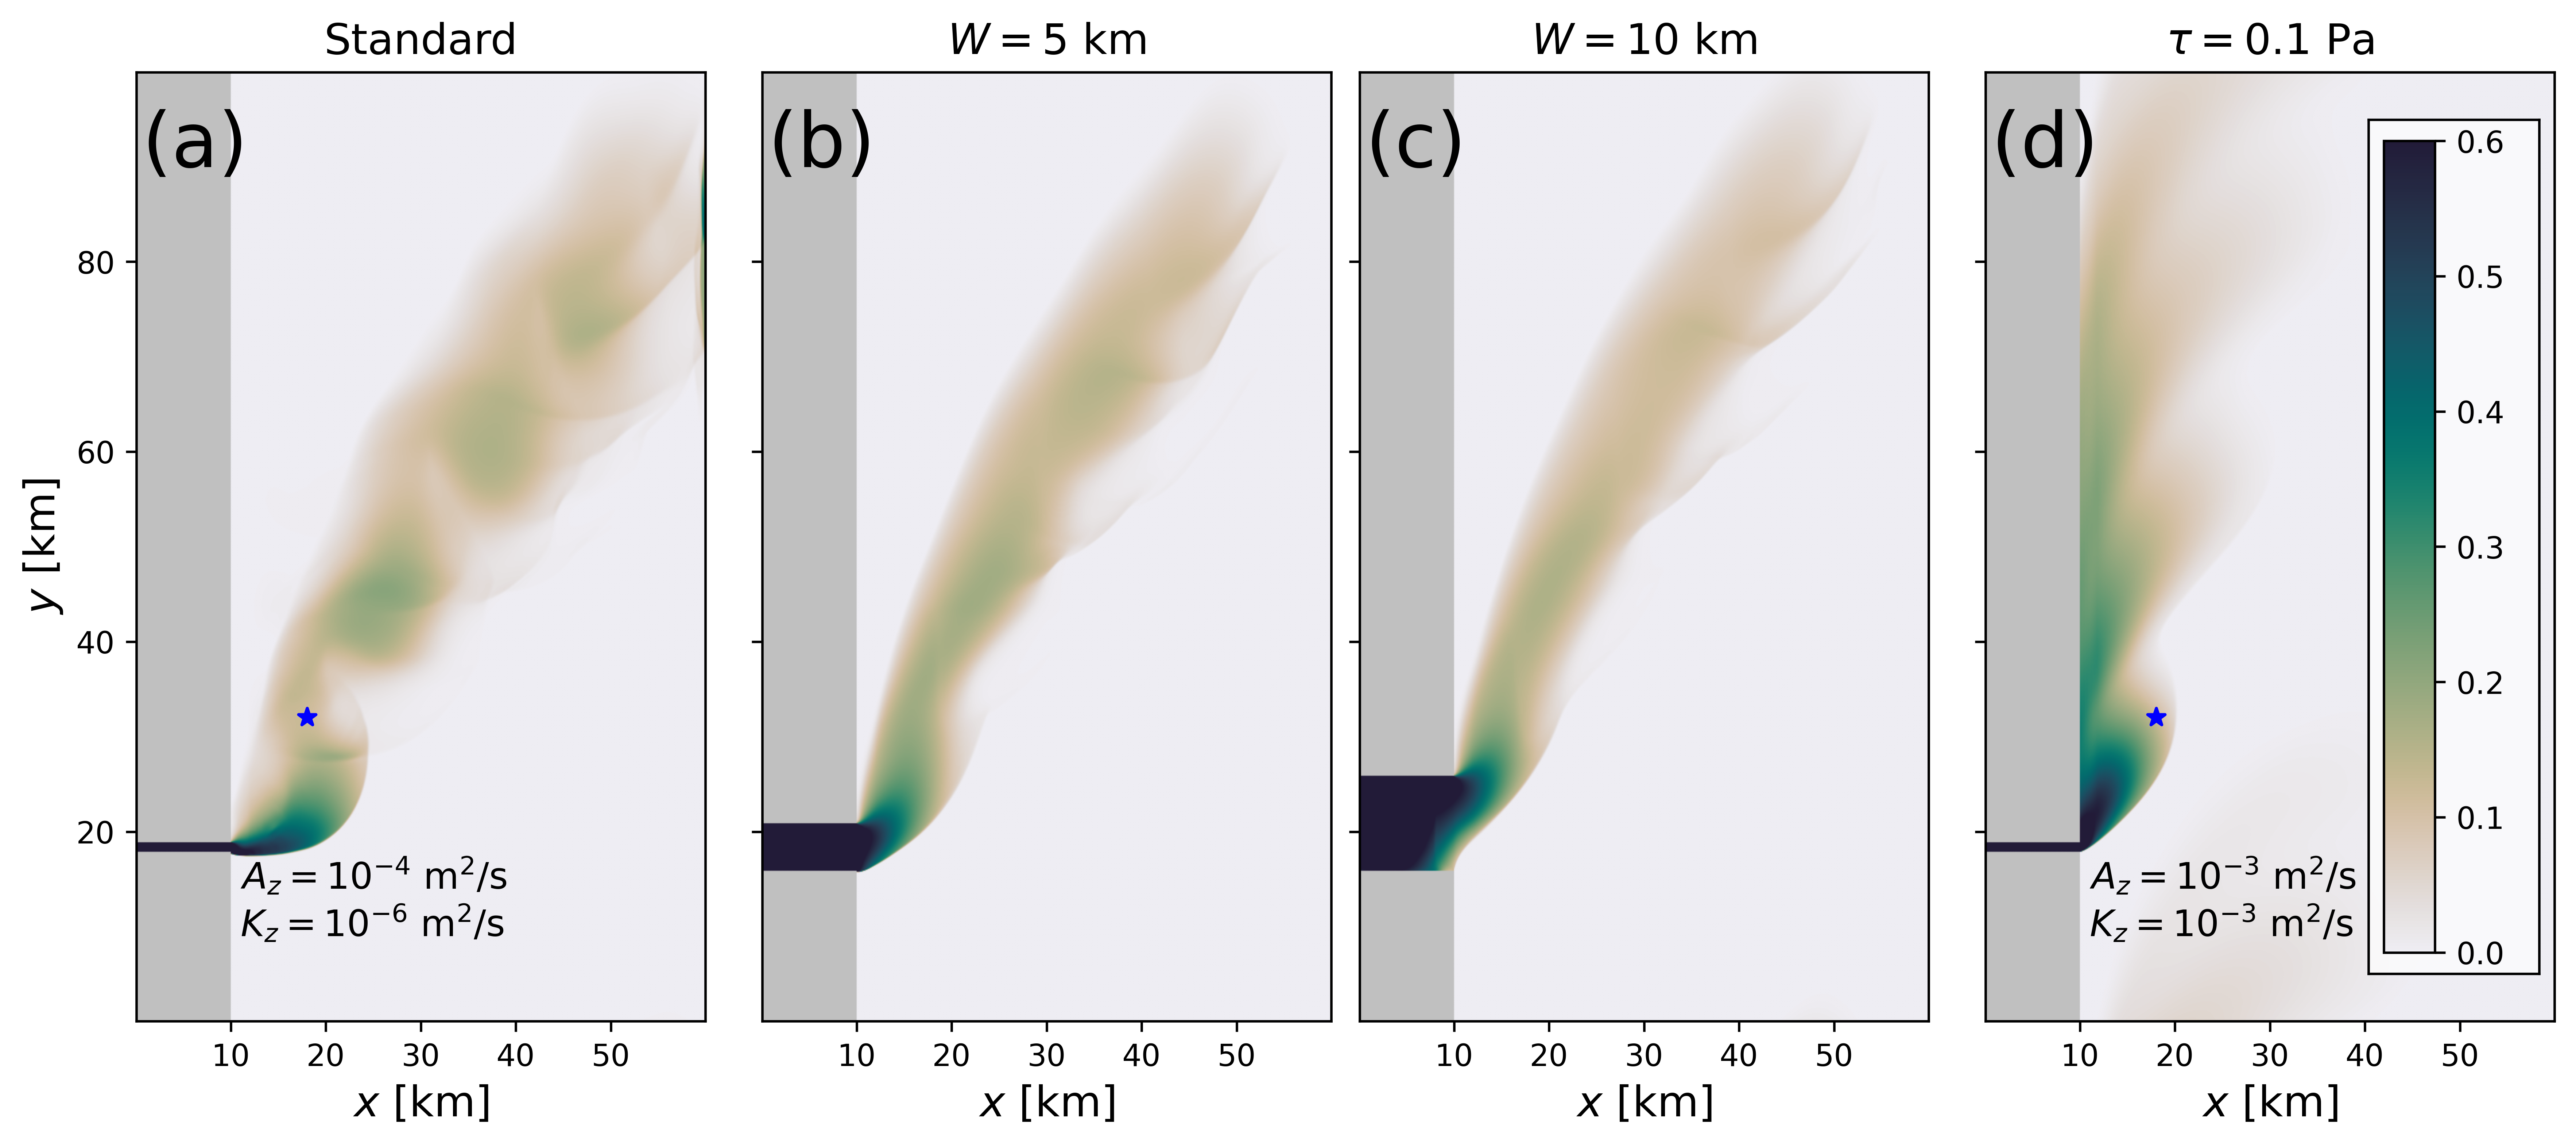

In [56]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(13, 10), dpi= 600, facecolor='w', edgecolor='k')
#main plots
ax1 = fig.add_axes([0.14,0.2,0.2,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([0.36,0.2,0.2,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax3 = fig.add_axes([0.57,0.2,0.2,0.6])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax4 = fig.add_axes([0.79,0.2,0.2,0.6])
current_cmap = plt.cm.get_cmap(cmocean.cm.rain).copy() #cmocean.cm.deep
current_cmap.set_bad(color='silver')
#FIRST SUBPLOT
quad1 = ax1.pcolormesh(xq/1000,yq/1000,hf1,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax1.scatter(xq[180]/1000,yq[320]/1000,marker='*',color='b')

ax1.set_title('Standard', fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)
ax1.set_aspect('equal'); 
divider1 = make_axes_locatable(ax1); cax1 = divider1.new_vertical(size="5%", pad=0.7, pack_start=True)
ax1.text(0.01, 0.9, '(a)', transform=ax1.transAxes,fontsize=25)
ax1.text(11, 14, r'$A_z = 10^{-4}$ m$^2$/s',fontsize=12,color='k')
ax1.text(11, 9, r'$K_z = 10^{-6}$ m$^2$/s',fontsize=12,color='k')

quad2 = ax2.pcolormesh(xq/1000,yq/1000,hf2,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax2.set_title('$W = 5 $ km', fontsize=14)
ax2.set_facecolor((0.92, 0.92, 0.92))
ax2.axes.set_yticklabels([])
ax2.set_xlabel('$x$ [km]',fontsize=14)
ax2.set_aspect('equal');
divider2 = make_axes_locatable(ax2); cax2 = divider2.new_vertical(size="5%", pad=0.7, pack_start=True)
ax2.text(0.01, 0.9, '(b)',transform=ax2.transAxes,fontsize=25)

quad3 = ax3.pcolormesh(xq/1000,yq/1000,hf3,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax3.set_title('$W = 10 $ km', fontsize=14)
ax3.set_facecolor((0.92, 0.92, 0.92))
ax3.axes.set_yticklabels([])
ax3.set_xlabel('$x$ [km]',fontsize=14)
ax3.set_aspect('equal'); 
divider3 = make_axes_locatable(ax3); cax3 = divider3.new_vertical(size="5%", pad=0.7, pack_start=True)
ax3.text(0.01, 0.9, '(c)',transform=ax3.transAxes,fontsize=25)

quad4 = ax4.pcolormesh(xq/1000,yq/1000,hf4,cmap=current_cmap,vmin=0,vmax=.6,shading='gouraud')
ax4.set_title(r'$\tau = 0.1 $ Pa', fontsize=14)
ax4.set_facecolor((0.92, 0.92, 0.92))
ax4.axes.set_yticklabels([])
ax4.set_xlabel('$x$ [km]',fontsize=14)
ax4.set_aspect('equal'); 
divider4 = make_axes_locatable(ax4); cax4 = divider4.new_vertical(size="5%", pad=0.7, pack_start=True)
ax4.text(0.01, 0.9, '(d)',transform=ax4.transAxes,fontsize=25)
ax4.text(11, 14, r'$A_z = 10^{-3}$ m$^2$/s',fontsize=12,color='k')
ax4.text(11, 9, r'$K_z = 10^{-3}$ m$^2$/s',fontsize=12,color='k')
ax4.scatter(xq[180]/1000,yq[320]/1000,marker='*',color='b')

#Fancy colorbar!
cbbox = inset_axes(ax4, '30%', '90%', loc = 7)
cbbox.axes.set_yticklabels([])
cbbox.axes.set_xticklabels([])
cbbox.tick_params(left=False, right=False, bottom = False, top = False)
cbbox.set_facecolor([1,1,1,0.7])
cbaxes = inset_axes(cbbox, '30%', '95%', loc = 6)
fig.colorbar(quad4,cax=cbaxes) #make colorbar


#fig.savefig('Figure1.png', format='png', dpi=600)